In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
from scipy.stats import pearsonr
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)


In [2]:
df_app = pd.read_csv('AssignmentData/appearances.csv')
df_player_val = pd.read_csv('AssignmentData/player_valuations.csv')
df_games = pd.read_csv('AssignmentData/games.csv')

df_club_games = pd.read_csv('AssignmentData/club_games.csv')
df_club = pd.read_csv('AssignmentData/clubs.csv')
df_comp = pd.read_csv('AssignmentData/competitions.csv')
df_game_events = pd.read_csv('AssignmentData/game_events.csv')
df_game_lineups = pd.read_csv('AssignmentData/game_lineups.csv')
df_players = pd.read_csv('AssignmentData/players.csv')
pd.set_option('display.max_columns', None) # Display all columns

In [3]:
# Optimize data types
df_app['game_id'] = df_app['game_id'].astype('int32')
df_app['player_id'] = df_app['player_id'].astype('int32')
df_app['goals'] = df_app['goals'].astype('int16')
df_app['assists'] = df_app['assists'].astype('int16')
df_app['minutes_played'] = df_app['minutes_played'].astype('int16')

df_player_val['player_id'] = df_player_val['player_id'].astype('int32')
df_player_val['market_value_in_eur'] = df_player_val['market_value_in_eur'].astype('float32')

df_games['game_id'] = df_games['game_id'].astype('int32')


In [4]:
df_games = df_games[['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_name',
       'away_club_name', 'aggregate']]
df_games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,RFK Akhmat Grozny,FK Spartak Moskva,2:1
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,PFK Krylya Sovetov Samara,Amkar Perm,0:2
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,PFK CSKA Moskva,FK Dinamo Moskva,0:2
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1
...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,Stoke City,NaN,6:1


In [5]:
# Merge appearances with games first on game_id
df_merged = df_app.merge(df_games, on='game_id', how='inner')

In [6]:
# Then merge the result with player valuation on player_id
df_mergedz = df_merged.merge(df_player_val, on='player_id', how='inner')

In [7]:
df_mergedz

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,competition_id_y,season,round,date_y,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2006-02-15 00:00:00,2006-02-15,2006-02-13,75000.0,1,235,NL1
1,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2009-01-11 00:00:00,2009-01-11,2009-01-05,75000.0,1,235,NL1
2,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2010-01-04 00:00:00,2010-01-04,2010-01-04,175000.0,1,235,NL1
3,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2012-10-09 00:00:00,2012-10-09,2012-10-08,300000.0,1,235,NL1
4,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2013-01-17 00:00:00,2013-01-17,2013-01-14,500000.0,1,235,NL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542517,4098878_580434,4098878,580434,2727,2727,2023-11-26,Tobe Leysen,BE1,0,0,0,0,90,BE1,2023,15. Matchday,2023-11-26,2727,2282,0,1,Oud-Heverlee Leuven,Club Brugge Koninklijke Voetbalvereniging,0:1,2023,2022-11-04 00:00:00,2022-11-04,2022-10-31,400000.0,1,2727,BE1
36542518,4098878_580434,4098878,580434,2727,2727,2023-11-26,Tobe Leysen,BE1,0,0,0,0,90,BE1,2023,15. Matchday,2023-11-26,2727,2282,0,1,Oud-Heverlee Leuven,Club Brugge Koninklijke Voetbalvereniging,0:1,2023,2023-06-09 00:00:00,2023-06-09,2023-06-05,300000.0,1,2727,BE1
36542519,4172110_624258,4172110,624258,31,31,2023-11-30,Conor Bradley,EL,0,0,0,0,8,EL,2023,Group E,2023-11-30,31,413,4,0,Liverpool Football Club,NaN,4:0,2021,2021-10-05 00:00:00,2021-10-05,2021-10-04,400000.0,1,31,GB1
36542520,4172110_624258,4172110,624258,31,31,2023-11-30,Conor Bradley,EL,0,0,0,0,8,EL,2023,Group E,2023-11-30,31,413,4,0,Liverpool Football Club,NaN,4:0,2021,2022-06-15 00:00:00,2022-06-15,2022-06-13,1000000.0,1,31,GB1


In [9]:
# Calculate performance metrics
df_mergedz['goals_per_game'] = df_mergedz['goals'] / df_mergedz['minutes_played']
df_mergedz['assists_per_game'] = df_mergedz['assists'] / df_mergedz['minutes_played']
df_mergedz

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,competition_id_y,season,round,date_y,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id,goals_per_game,assists_per_game
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2006-02-15 00:00:00,2006-02-15,2006-02-13,75000.0,1,235,NL1,0.022222,0.0
1,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2009-01-11 00:00:00,2009-01-11,2009-01-05,75000.0,1,235,NL1,0.022222,0.0
2,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2010-01-04 00:00:00,2010-01-04,2010-01-04,175000.0,1,235,NL1,0.022222,0.0
3,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2012-10-09 00:00:00,2012-10-09,2012-10-08,300000.0,1,235,NL1,0.022222,0.0
4,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,7:0,2013,2013-01-17 00:00:00,2013-01-17,2013-01-14,500000.0,1,235,NL1,0.022222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542517,4098878_580434,4098878,580434,2727,2727,2023-11-26,Tobe Leysen,BE1,0,0,0,0,90,BE1,2023,15. Matchday,2023-11-26,2727,2282,0,1,Oud-Heverlee Leuven,Club Brugge Koninklijke Voetbalvereniging,0:1,2023,2022-11-04 00:00:00,2022-11-04,2022-10-31,400000.0,1,2727,BE1,0.000000,0.0
36542518,4098878_580434,4098878,580434,2727,2727,2023-11-26,Tobe Leysen,BE1,0,0,0,0,90,BE1,2023,15. Matchday,2023-11-26,2727,2282,0,1,Oud-Heverlee Leuven,Club Brugge Koninklijke Voetbalvereniging,0:1,2023,2023-06-09 00:00:00,2023-06-09,2023-06-05,300000.0,1,2727,BE1,0.000000,0.0
36542519,4172110_624258,4172110,624258,31,31,2023-11-30,Conor Bradley,EL,0,0,0,0,8,EL,2023,Group E,2023-11-30,31,413,4,0,Liverpool Football Club,NaN,4:0,2021,2021-10-05 00:00:00,2021-10-05,2021-10-04,400000.0,1,31,GB1,0.000000,0.0
36542520,4172110_624258,4172110,624258,31,31,2023-11-30,Conor Bradley,EL,0,0,0,0,8,EL,2023,Group E,2023-11-30,31,413,4,0,Liverpool Football Club,NaN,4:0,2021,2022-06-15 00:00:00,2022-06-15,2022-06-13,1000000.0,1,31,GB1,0.000000,0.0


In [1]:
# Define performance metrics and market value
performance_metrics = ['goals_per_game', 'assists_per_game']
market_value = df_mergedz['market_value_in_eur']

# Calculate correlation coefficients
correlations = df_mergedz[performance_metrics + ['market_value_in_eur']].corr()

# Print correlation coefficients
print("Correlation Coefficients:")
print(correlations['market_value_in_eur'])

NameError: name 'df_mergedz' is not defined

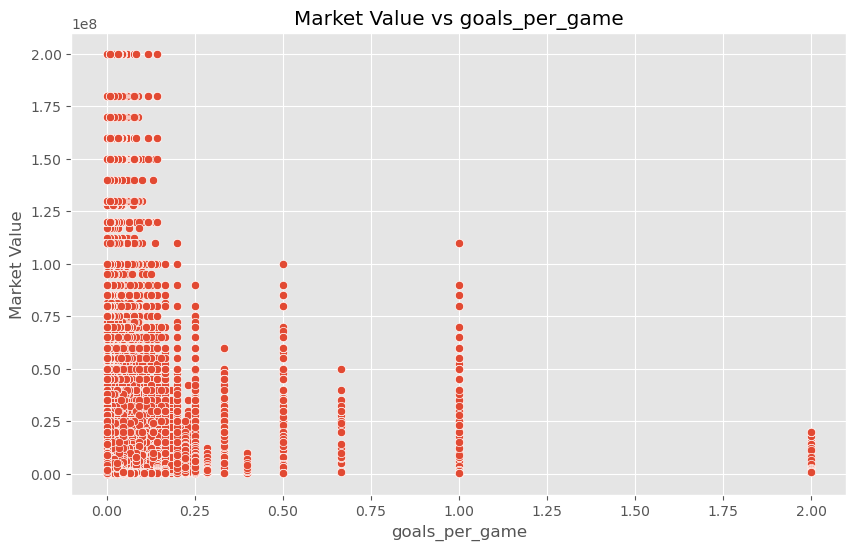

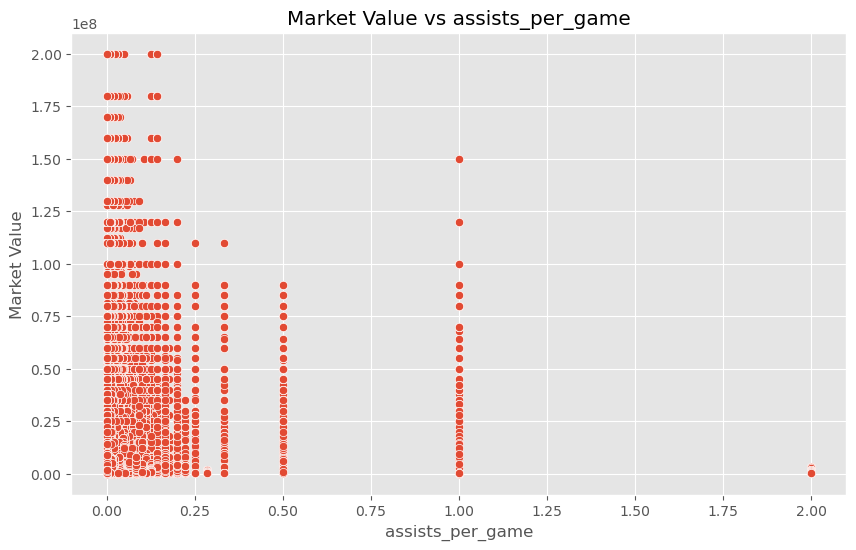

In [30]:
# Plotting
for metric in performance_metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=metric, y='market_value_in_eur', data=df_mergedz)
    plt.title(f'Market Value vs {metric}')
    plt.xlabel(metric)
    plt.ylabel('Market Value')
    plt.show()

In [5]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [6]:
df_games = df_games[['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position',
       'home_club_name',
       'away_club_name', 'aggregate', 'competition_type']]
df_games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,Stoke City,NaN,6:1,other


In [ ]:
# Merge datasets
df = df_app.merge(df_player_val, on='player_id').merge(df_games, on='game_id')


In [ ]:
df